In [160]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

In [161]:
from sklearn.pipeline import Pipeline

# Preparing data 

In [346]:
df=pd.read_csv('final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank',
'additive Distributor rank','Worldwide Gross ($)','IMDB score','IMDB votes','IMDB ID',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic'],axis=1,inplace=True)

df.fillna(df.median(),inplace=True)
logcolumns=['Domestic Gross ($)','Budget']
df.loc[:, logcolumns] = np.log(df[logcolumns])
test_year=np.where(df.Year.to_numpy()==2019)[0]
df.drop('Year',axis=1,inplace=True)
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
train_f=[item for item in df.columns if item!='Domestic Gross ($)']
Y=df['Domestic Gross ($)'].to_numpy()
X=df[train_f].to_numpy()
#X=scaler.fit_transform(X)
X_test=X[test_year]
Y_test=Y[test_year].reshape(-1,1)

X_train=X[:test_year[0]-1,:]
Y_train=Y[:test_year[0]-1].reshape(-1,1)


In [250]:
df

,Budget,Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,...,country Zambia,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank,Distributor rank,Domestic Gross ($)
0,0.966345,0.730525,0.194514,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.25,0.986414
1,0.952305,0.852456,0.120948,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25,0.25,0.950307
2,0.952305,0.788950,0.127182,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.937086
3,0.952305,0.926969,0.147132,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.25,0.932976
4,0.863070,0.945597,0.147132,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.930605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7091,0.780301,0.000000,0.063591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.175352
7092,0.780301,0.000000,0.091022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.247344
7093,0.780301,0.000000,0.122195,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.146227
7094,0.780301,0.000000,0.129676,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.194324


In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Linear model 

In [291]:
reg=LinearRegression()
reg.fit(X_train,Y_train)


LinearRegression()

In [292]:
reg.score(X_train,Y_train)

0.6765245853581687

In [293]:
mean_squared_error(Y_test,reg.predict(X_test))

3.4006159178385724

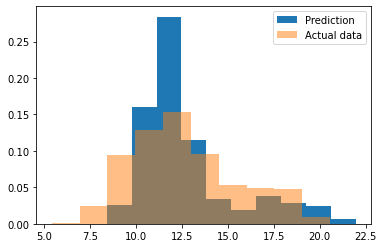

mean squared error: 3.4006159178385724


In [296]:
plt.hist(reg.predict(X_test),label='Prediction',density=True)
plt.hist(Y_test,alpha=0.5,label='Actual data',density=True)
plt.legend()
plt.show()
print("mean squared error:",mean_squared_error(Y_test,reg.predict(X_test)))

Let's use PCA to reduce the dimension of our data 

In [303]:
from sklearn.decomposition import PCA 

In [352]:
pca=PCA(n_components=5)
X_pca=pca.fit_transform(X)

In [415]:
X_test=X_pca[test_year]
Y_test=Y[test_year].reshape(-1,1)

X_train=X_pca[:test_year[0]-1,:]
Y_train=Y[:test_year[0]-1].reshape(-1,1)


In [417]:
X_train.shape

(6309, 5)

# KNN

Learning Curve 

In [370]:
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.neighbors import KNeighborsRegressor

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.8min finished


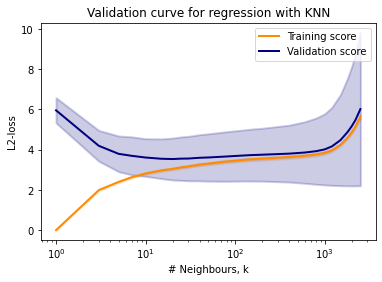

In [428]:
k_list = [1,3,5,7,10, 15, 20, 25, 30, 40, 50 , 75,  100, 125, 150, 175, 200,400,600,800,1000,1200,1500,1800,2000,2200,2500]

train_scores, valid_scores = validation_curve(KNeighborsRegressor(), X_train, Y_train, 
                                              param_name="n_neighbors",
                                              param_range=k_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = '# Neighbours, k'
ylabel = 'L2-loss'

plt_title = 'Validation curve for regression with KNN'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(k_list, train_scores_mean,label="Training score",
             color="darkorange", lw=2)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(k_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(k_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

Text(500, 0.6629804126923857, '(600,0.16)')

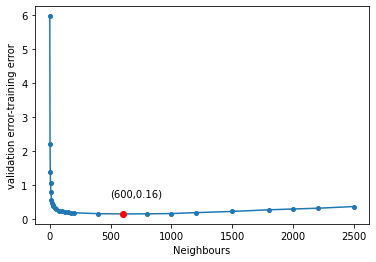

In [409]:
res=valid_scores_mean-train_scores_mean
plt.plot(k_list,res,'-o',ms=4)
plt.xlabel('Neighbours')
plt.ylabel('validation error-training error')
index=np.argmin(res)
plt.plot(k_list[index],res[index],'ro')
plt.text(x=k_list[index]-100,y=res[index]+0.5,s='(%i,%.2f)'%(k_list[index],res[index]))

In [411]:
knn=KNeighborsRegressor(n_neighbors=k_list[index])
knn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=600)

In [412]:
mean_squared_error(knn.predict(X_test),Y_test)

3.1204897693149602

In [429]:
ns_list=[ 601,  651,  701,  751,  801,  851,  901,  951, 1001, 1051,
       1101, 1151, 1201, 1251, 1301, 1351, 1401, 1451, 1501, 1551, 1601,
       1651, 1701, 1751, 1801, 1851, 1901, 1951, 2001, 2051, 2101, 2151,2251,2351,2451,2551,2651,2751,2851,2951,3000]
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = KNeighborsRegressor(n_neighbors=k_list[index]), 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

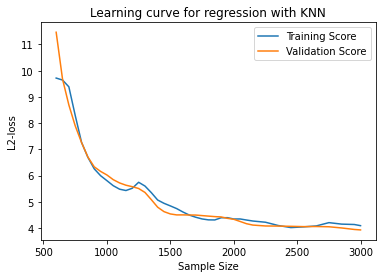

In [430]:
train_scores_mean =  -train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  -validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = 'L2-loss'

plt_title = 'Learning curve for regression with KNN'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

#plt.fill_between(ns_list, train_scores_mean - train_scores_std,
 #                train_scores_mean + train_scores_std, alpha=0.2,
  #               color="darkblue", lw=2)
#plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
   #              validation_scores_mean + validation_scores_std, alpha=0.2,
    #             color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()